In [2]:
import pandas as pd 
import numpy as np
from processador_ibovespa import ProcessadorIbovespa
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
caminho_arquivo = "../../dados/investimento/ibovespa_historico.csv"

df = pd.read_csv(caminho_arquivo, sep = ';')

In [4]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.10.2023,113.144,112.534,113.597,112.098,"10,56M","0,54%"
1,31.10.2022,116.037,114.533,116.763,112.113,"21,64M","1,31%"
2,31.10.2019,107.220,108.403,108.403,106.356,"5,38M","-1,10%"
3,31.10.2018,87.424,86.889,88.028,86.213,"6,07M","0,62%"
4,31.10.2017,74.308,74.798,75.142,74.145,"3,66M","-0,66%"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      5714 non-null   object 
 1   Último    5714 non-null   float64
 2   Abertura  5714 non-null   float64
 3   Máxima    5714 non-null   float64
 4   Mínima    5714 non-null   float64
 5   Vol.      5713 non-null   object 
 6   Var%      5714 non-null   object 
dtypes: float64(4), object(3)
memory usage: 312.6+ KB


In [6]:
# Criando o índice a partir da coluna de data

df.index = pd.to_datetime(df.Data, format = "%d.%m.%Y")

In [7]:
df.drop(columns=['Data'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5714 entries, 2023-10-31 to 2001-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    5714 non-null   float64
 1   Abertura  5714 non-null   float64
 2   Máxima    5714 non-null   float64
 3   Mínima    5714 non-null   float64
 4   Vol.      5713 non-null   object 
 5   Var%      5714 non-null   object 
dtypes: float64(4), object(2)
memory usage: 312.5+ KB


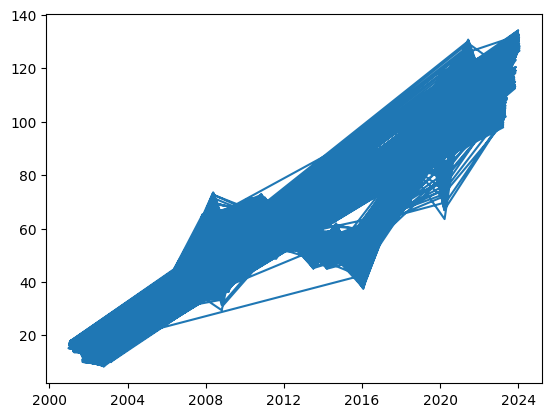

In [9]:
plt.plot(df.index,df.Último)

In [10]:
# Selecionando apenas a coluna Último do df

df_indice = df[['Último']]
df_indice.rename(columns={'Último':'fechamento'}, inplace=True)

C:\Users\Sergio Velloso\AppData\Local\Temp\ipykernel_11980\3962309895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indice.rename(columns={'Último':'fechamento'}, inplace=True)


In [11]:
df_indice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5714 entries, 2023-10-31 to 2001-02-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fechamento  5714 non-null   float64
dtypes: float64(1)
memory usage: 89.3 KB


In [12]:
df_indice = df_indice.asfreq('D').interpolate(method='linear')
#df_indice = df_indice.asfreq('D').fillna(method='ffill')


In [13]:
df_indice.head()

,fechamento
Data,
2000-12-27,15.1860
2000-12-28,15.2590
2000-12-29,15.2922
2000-12-30,15.3254
2000-12-31,15.3586


In [14]:
resultados = seasonal_decompose(df_indice)

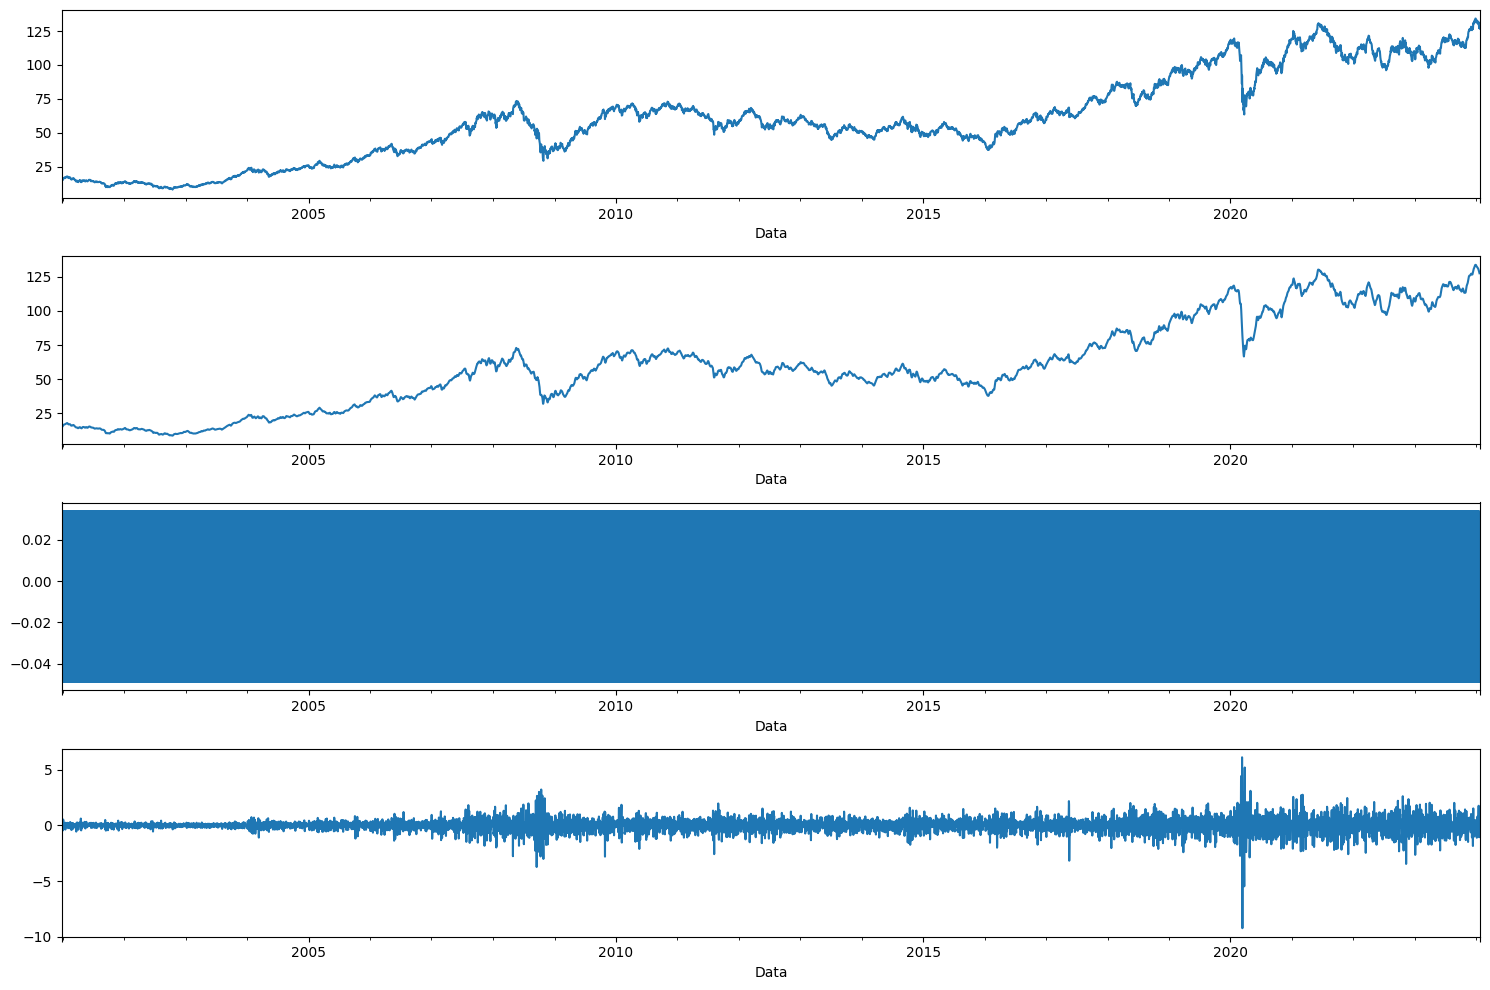

In [15]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize= (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)


plt.tight_layout()

In [16]:
# Verificando se existe estacionaridade

X = df_indice.fechamento.values
result = adfuller(X)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -0.7250990534259051
P-Value: 0.8401407693003322
Valores críticos:
	1%: -3.431127799890638
	5%: -2.861883734127751
	10%: -2.566952964804653


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

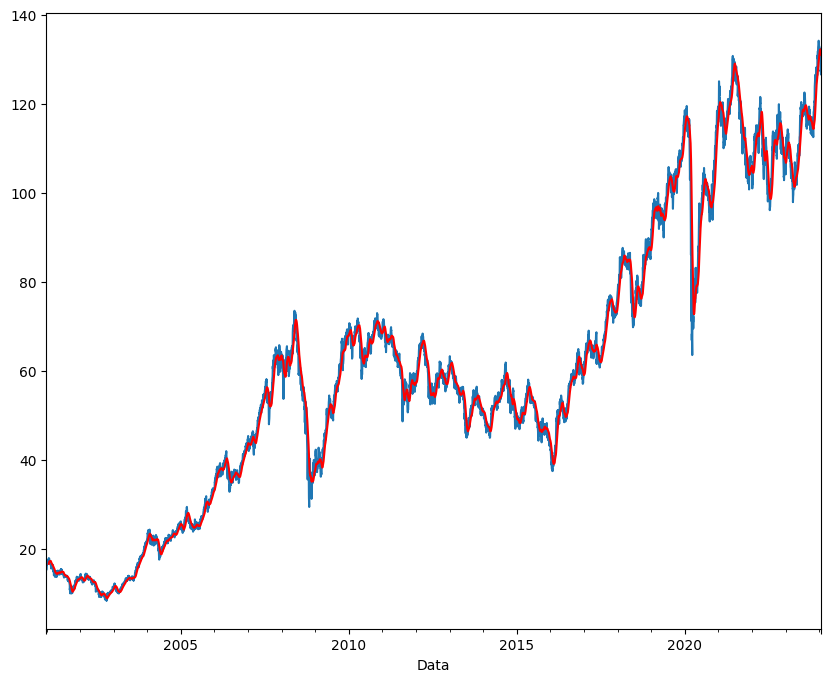

In [17]:
# Cálculo da média móvel

ma = df_indice.rolling(30).mean()

f, ax = plt.subplots(figsize=(10,8))
df_indice.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r') 
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

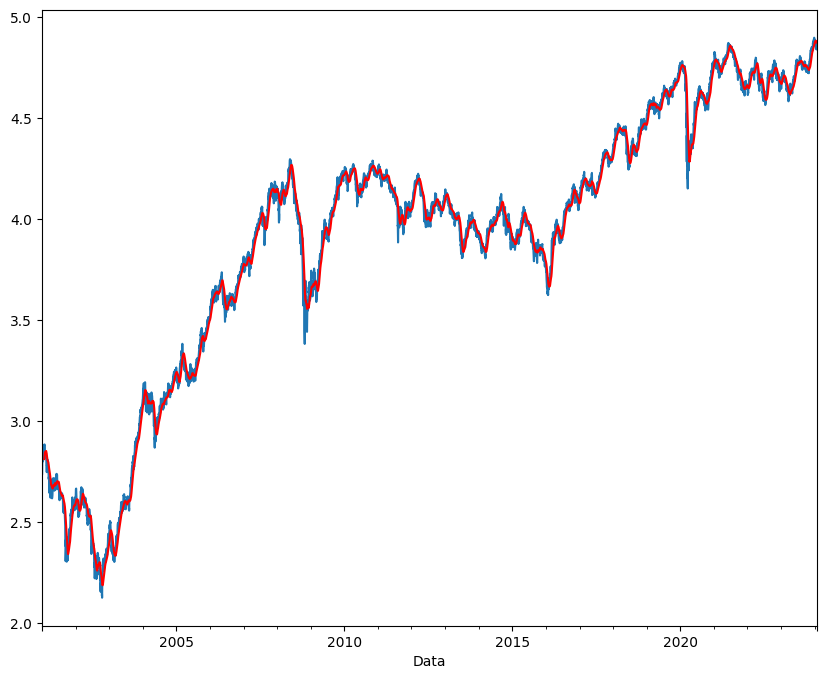

In [18]:
# Diferenciando buscando a estacionariedade

# Aplicando logaritimo

df_indice_log = np.log(df_indice)
ma_log = df_indice_log.rolling(30).mean()


f, ax = plt.subplots(figsize=(10,8))
df_indice_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r') 
plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

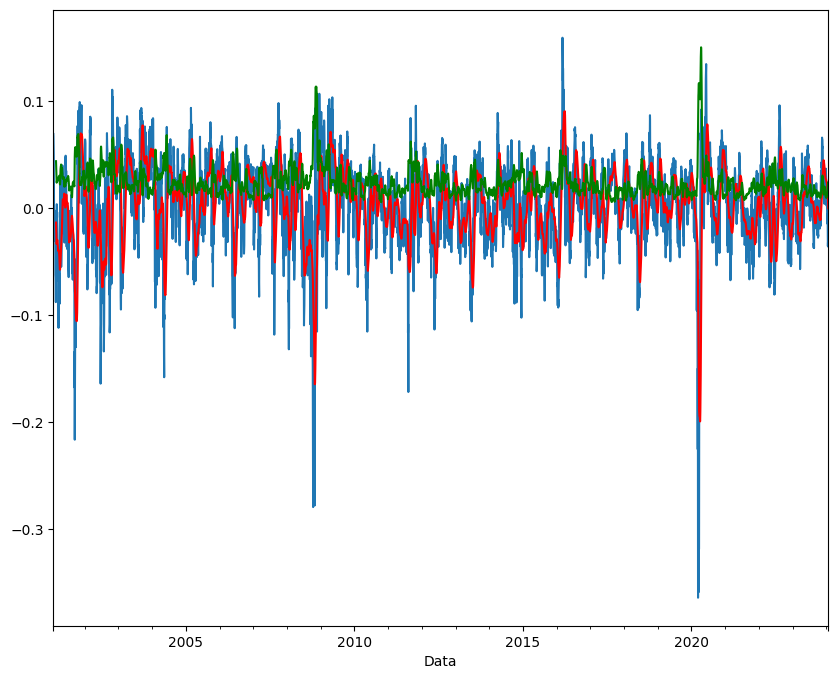

In [19]:
# Aplicando logaritimo e subtraindo a média móvel

df_s = (df_indice_log - ma_log).dropna()

ma_s = df_s.rolling(30).mean()

std = df_s.rolling(30).std()

f, ax = plt.subplots(figsize=(10,8))
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r') 
std.plot(ax=ax, legend=False, color='g') 
plt.tight_layout

In [20]:
# Verificando novamente o teste de ADF

X_s = df_s.fechamento.values
result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste Estatístico: {result_s[0]}')
print(f'P-Value: {result_s[1]}')
print('Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -12.645374677960675
P-Value: 1.4055122798630035e-23
Valores críticos:
	1%: -3.4311314247270106
	5%: -2.8618853358458023
	10%: -2.5669538174128843


Teste ADF
Teste Estatístico: -22.722710602748034
P-Value: 0.0
Valores críticos:
	1%: -3.431131985395069
	5%: -2.861885583589818
	10%: -2.5669539492891746


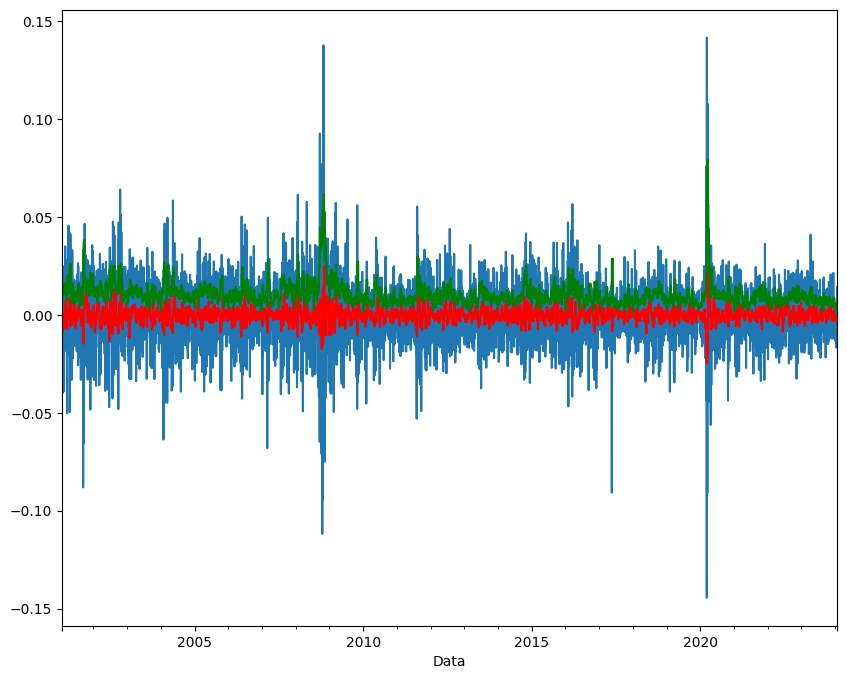

In [21]:
# Diferenciando

df_diff = df_s.diff(1).dropna()
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots(figsize=(10,8))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r') 
std_diff.plot(ax=ax, legend=False, color='g') 
plt.tight_layout

X_diff = df_diff.fechamento.values
result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste Estatístico: {result_diff[0]}')
print(f'P-Value: {result_diff[1]}')
print('Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')


In [22]:
# Verificando o ACF e PACF

lag_acf = acf(df_diff.dropna(), nlags=30)
lag_pacf = pacf(df_diff.dropna(), nlags=30)


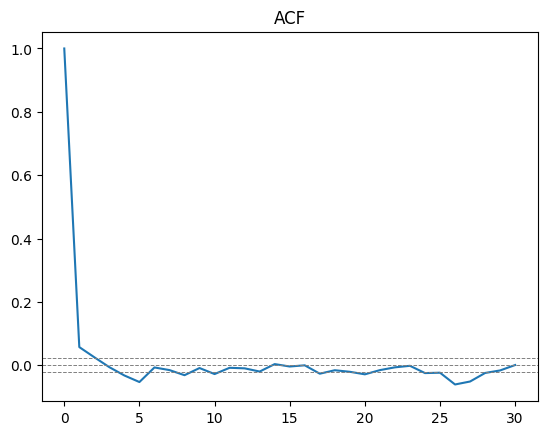

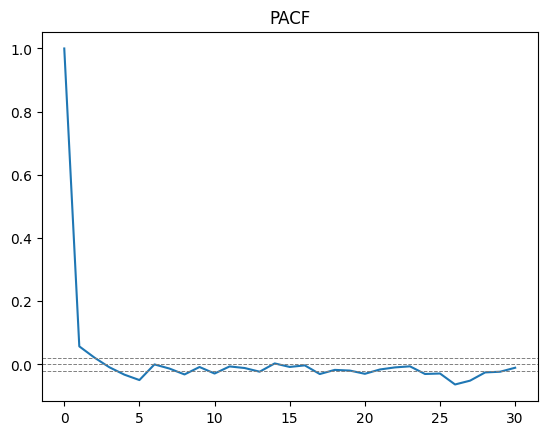

In [23]:
#Tolerância de 5% ACF
#1.96/sqrt(N-d) -> N: Número de Pontos do df e  d: é o número de vezes que nós diferenciamos o dataframe.

plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth = '.7')
plt.axhline(y = 1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth = '.7')
plt.axhline(y = 1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)

plt.title("PACF")
plt.show()


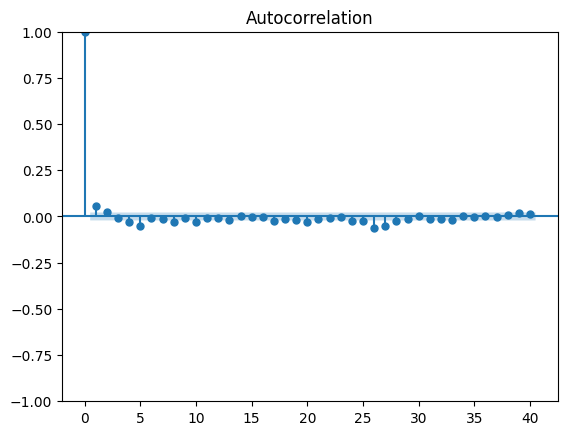

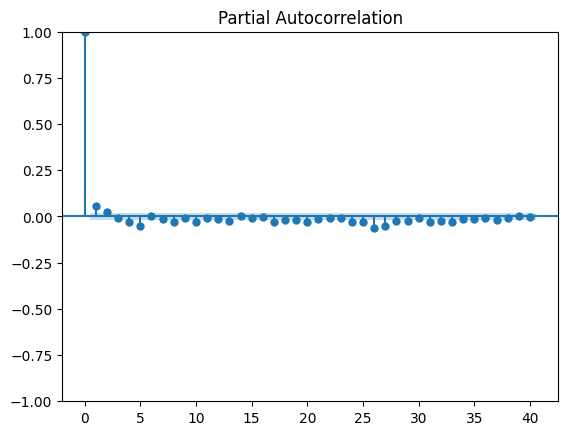

In [24]:
plot_acf(df_diff.fechamento)
plot_pacf(df_diff.fechamento)

plt.show()

In [25]:
df_fechamento = df_indice.reset_index()
df_fechamento.rename(columns={'Data':'ds', 'fechamento':'y'}, inplace=True)
df_fechamento['unique_id'] = 'ibovespa' 

In [26]:
treino = df_fechamento.loc[df_fechamento['ds'] < '2023-10-26']
valid = df_fechamento.loc[df_fechamento['ds'] >= '2023-10-26']
h = valid['ds'].nunique()

In [27]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum()/ np.abs(y_true).sum()

In [28]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

c:\Users\Sergio Velloso\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


WMAPE: 10.85%


c:\Users\Sergio Velloso\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


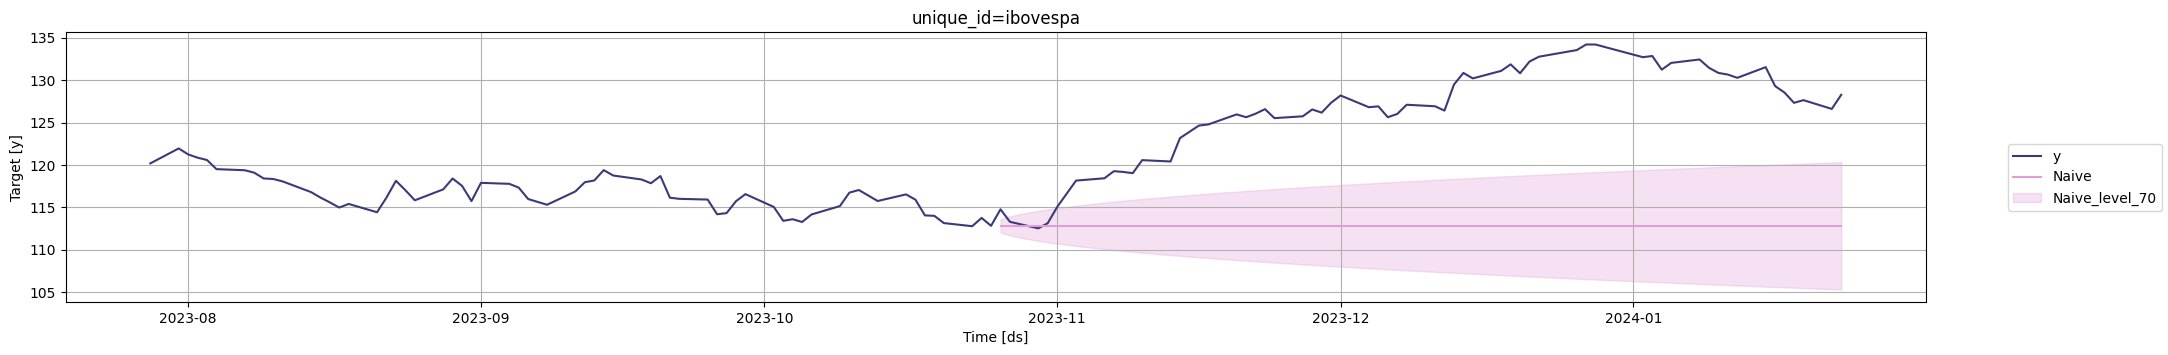

In [29]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs= -1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[70])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f'WMAPE: {wmape1:.2%}')

model.plot(treino, forecast_df, level=[70], unique_ids=['ibovespa'],engine='matplotlib', max_insample_length=90)

In [30]:
forecast_df

,unique_id,ds,Naive,Naive-lo-70,Naive-hi-70,y
0,ibovespa,2023-10-26,112.830002,112.039680,113.620323,114.777000
1,ibovespa,2023-10-27,112.830002,111.712318,113.947685,113.301000
2,ibovespa,2023-10-28,112.830002,111.461128,114.198875,113.044667
3,ibovespa,2023-10-29,112.830002,111.249359,114.410645,112.788333
4,ibovespa,2023-10-30,112.830002,111.062790,114.597214,112.532000
...,...,...,...,...,...,...
85,ibovespa,2024-01-19,112.830002,105.500870,120.159134,127.636000
86,ibovespa,2024-01-20,112.830002,105.458382,120.201622,127.291333
87,ibovespa,2024-01-21,112.830002,105.416138,120.243866,126.946667
88,ibovespa,2024-01-22,112.830002,105.374130,120.285873,126.602000


WMAPE: 9.00%


c:\Users\Sergio Velloso\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


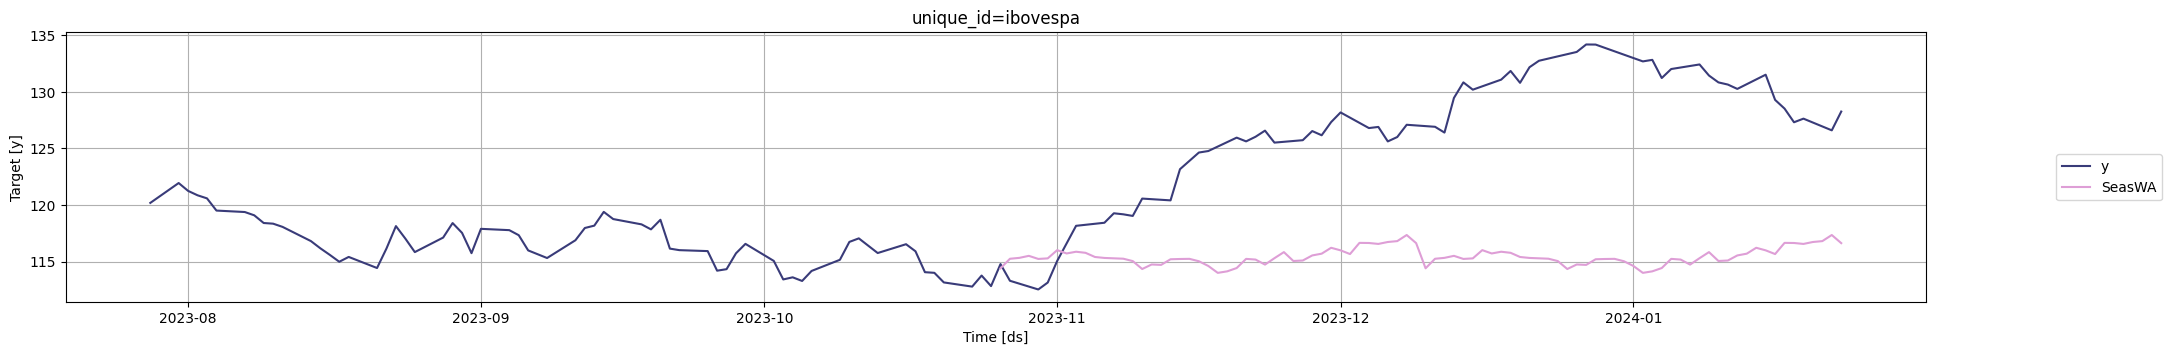

In [31]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=45, window_size=4)], freq='D', n_jobs= -1)
model_sm.fit(treino)

forecast_df_sm = model_sm.predict(h=h)
forecast_df_sm = forecast_df_sm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_df_sm['y'].values, forecast_df_sm['SeasWA'].values)
print(f'WMAPE: {wmape3:.2%}')

model_sm.plot(treino, forecast_df_sm, unique_ids=['ibovespa'],engine='matplotlib', max_insample_length=90)

WMAPE: 7.41%


c:\Users\Sergio Velloso\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


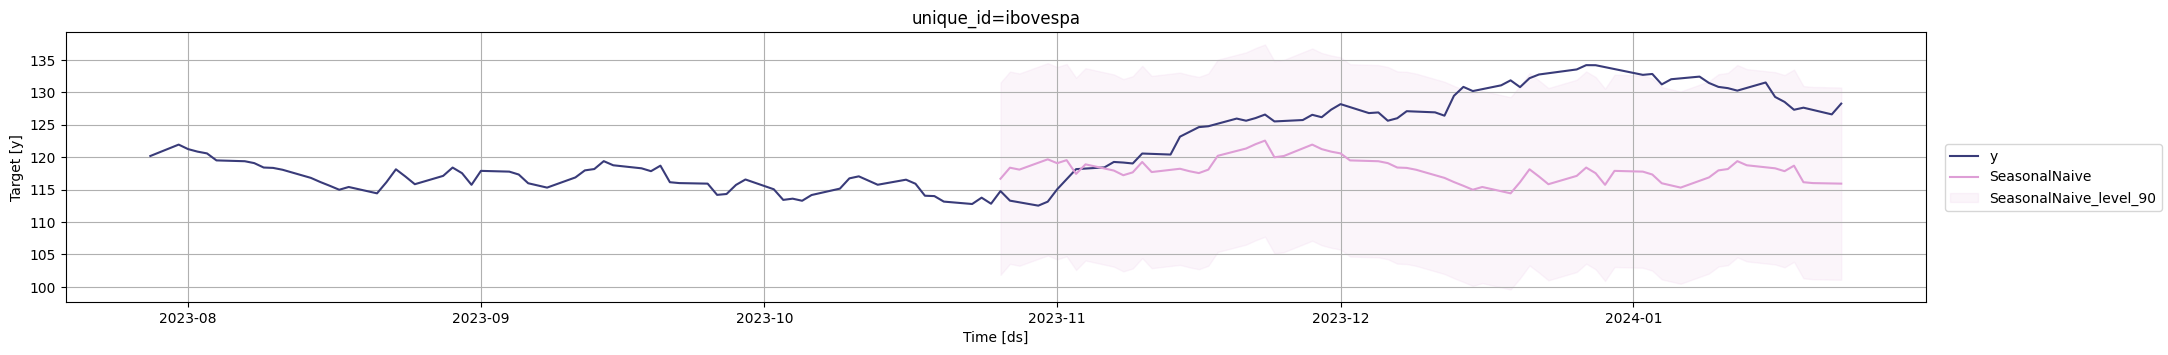

In [32]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=120)], freq='D', n_jobs= -1)
model_s.fit(treino)

forecast_df_s = model_s.predict(h=h, level=[90])
forecast_df_s = forecast_df_s.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_df_s['y'].values, forecast_df_s['SeasonalNaive'].values)
print(f'WMAPE: {wmape2:.2%}')

model_s.plot(treino, forecast_df_s, level=[90], unique_ids=['ibovespa'],engine='matplotlib', max_insample_length=90)

WMAPE: 10.88%


c:\Users\Sergio Velloso\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


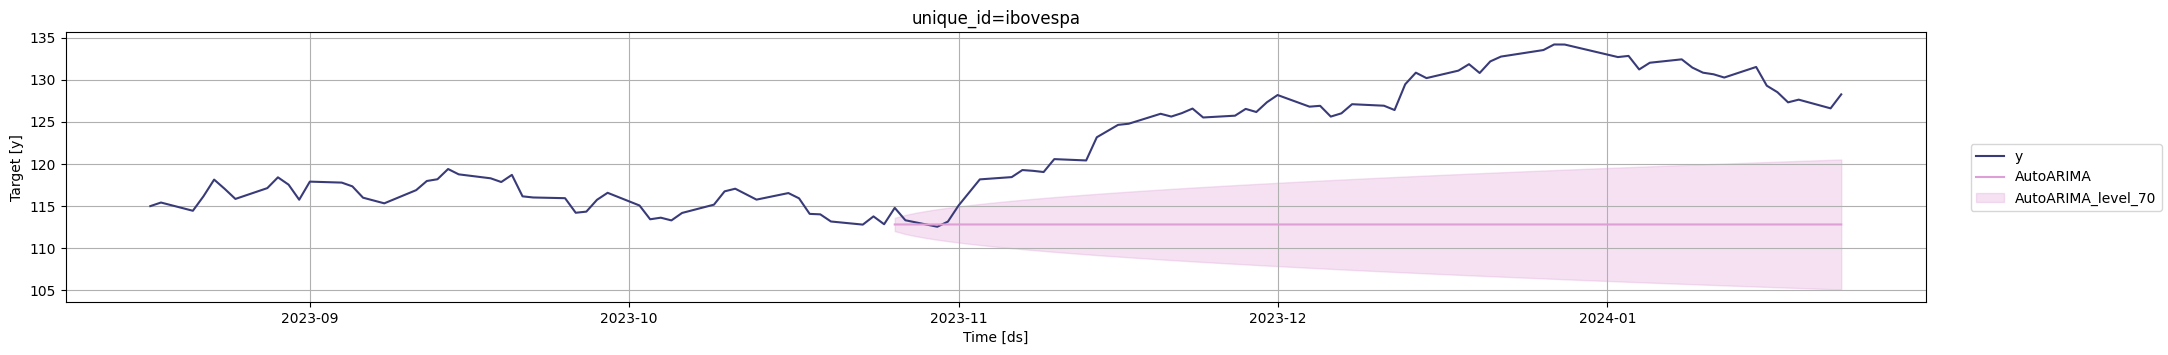

In [33]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I: Quantidade que a série foi diferenciada / MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(seasonal=False)], freq='D', n_jobs= -1)
model_a.fit(treino)

forecast_df_a = model_a.predict(h=h, level=[70])
forecast_df_a = forecast_df_a.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_df_a['y'].values, forecast_df_a['AutoARIMA'].values)
print(f'WMAPE: {wmape4:.2%}')

model_a.plot(treino, forecast_df_a, level=[70], unique_ids=['ibovespa'],engine='matplotlib', max_insample_length=70)

In [34]:
forecast_df_a

,unique_id,ds,AutoARIMA,AutoARIMA-lo-70,AutoARIMA-hi-70,y
0,ibovespa,2023-10-26,112.801865,112.011856,113.591873,114.777000
1,ibovespa,2023-10-27,112.801018,111.666786,113.935242,113.301000
2,ibovespa,2023-10-28,112.800995,111.404564,114.197418,113.044667
3,ibovespa,2023-10-29,112.800987,111.184334,114.417648,112.788333
4,ibovespa,2023-10-30,112.800987,110.990700,114.611275,112.532000
...,...,...,...,...,...,...
85,ibovespa,2024-01-19,112.800987,105.249420,120.352562,127.636000
86,ibovespa,2024-01-20,112.800987,105.205612,120.396370,127.291333
87,ibovespa,2024-01-21,112.800987,105.162056,120.439926,126.946667
88,ibovespa,2024-01-22,112.800987,105.118744,120.483238,126.602000
